<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head(20)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

,0
Employment,0
JobSat,36311
RemoteWork,10631


In [8]:
df['Employment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

In [6]:
df['JobSat'].info()
df['JobSat'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: JobSat
Non-Null Count  Dtype  
--------------  -----  
29126 non-null  float64
dtypes: float64(1)
memory usage: 511.4 KB


array([nan,  8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

In [9]:
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].median())
df['JobSat'].value_counts(dropna=False)

,count
JobSat,
7.0,42690
8.0,7509
6.0,3751
9.0,3626
10.0,2251
5.0,1956
3.0,1165
4.0,1130
2.0,772


In [10]:
df['JobSat'] = df['JobSat'].astype('int64')
df['JobSat']

,JobSat
0,7
1,7
2,7
3,7
4,7
...,...
65432,7
65433,7
65434,7
65435,7


In [11]:
df['JobSat'].unique()

array([ 7,  8,  5, 10,  6,  9,  4,  3,  2,  1,  0])

In [12]:
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
df['RemoteWork']

,RemoteWork
0,Remote
1,Remote
2,Remote
3,"Hybrid (some remote, some in-person)"
4,"Hybrid (some remote, some in-person)"
...,...
65432,Remote
65433,Remote
65434,In-person
65435,"Hybrid (some remote, some in-person)"


In [13]:
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

,0
Employment,0
JobSat,0
RemoteWork,0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [17]:
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [15]:
df['YearsCodePro_num'] = (
    df['YearsCodePro']
    .replace({'Less than 1 year': 0, 'More than 50 years': 51})
)

df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro_num'], errors='coerce')
df['YearsCodePro_num']

,YearsCodePro_num
0,NaN
1,17.0
2,27.0
3,NaN
4,NaN
...,...
65432,3.0
65433,NaN
65434,5.0
65435,2.0


In [16]:
df['YearsCodePro_num'] = df['YearsCodePro_num'].fillna(df['YearsCodePro_num'].median())
df['YearsCodePro_num']

,YearsCodePro_num
0,7.0
1,17.0
2,27.0
3,7.0
4,7.0
...,...
65432,3.0
65433,7.0
65434,5.0
65435,2.0


In [18]:
df['YearsCodePro_num'] = df['YearsCodePro_num'].astype('Int64')
df['YearsCodePro_num']

,YearsCodePro_num
0,7
1,17
2,27
3,7
4,7
...,...
65432,3
65433,7
65434,5
65435,2


In [19]:
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '>20']

df['ExperienceRange'] = pd.cut(df['YearsCodePro_num'], bins=bins, labels=labels, right=False)
df['ExperienceRange']

,ExperienceRange
0,5-10
1,10-20
2,>20
3,5-10
4,5-10
...,...
65432,0-5
65433,5-10
65434,5-10
65435,0-5


In [20]:
median_by_range = df.groupby('ExperienceRange')['JobSat'].median()
print(median_by_range)

ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
>20      7.0
Name: JobSat, dtype: float64


/tmp/ipython-input-2830318281.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_range = df.groupby('ExperienceRange')['JobSat'].median()


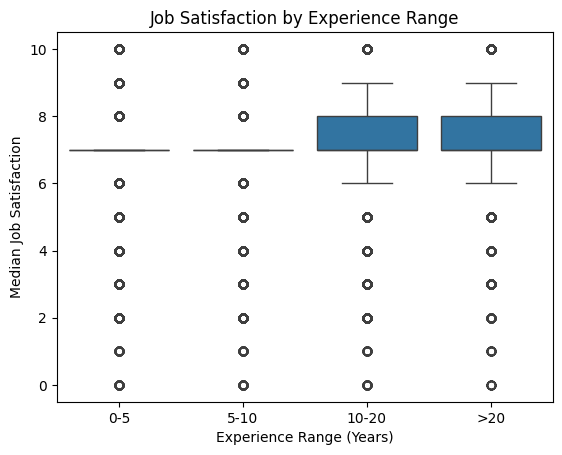

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(x='ExperienceRange', y='JobSat', data=df)
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction by Experience Range')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


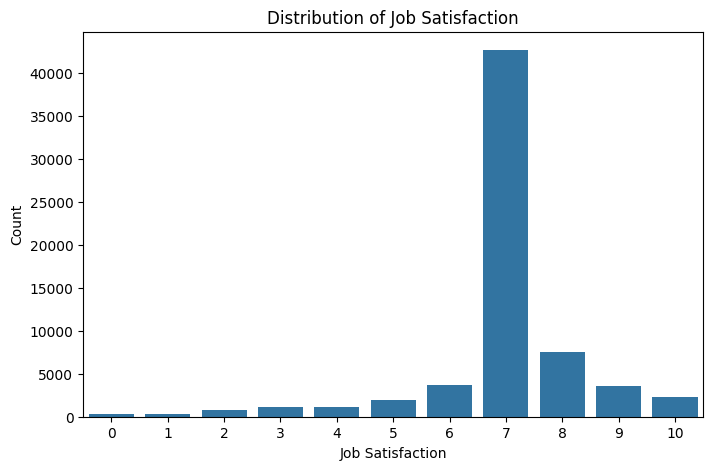

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='JobSat', data=df)
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


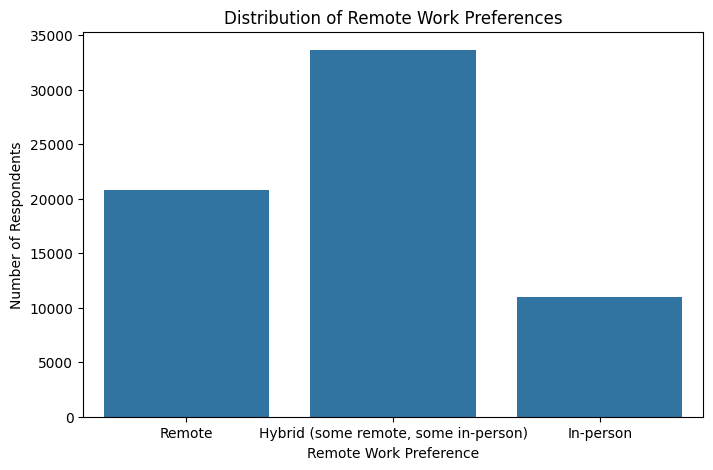

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='RemoteWork',data=df)
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Remote Work Preferences')
plt.show()

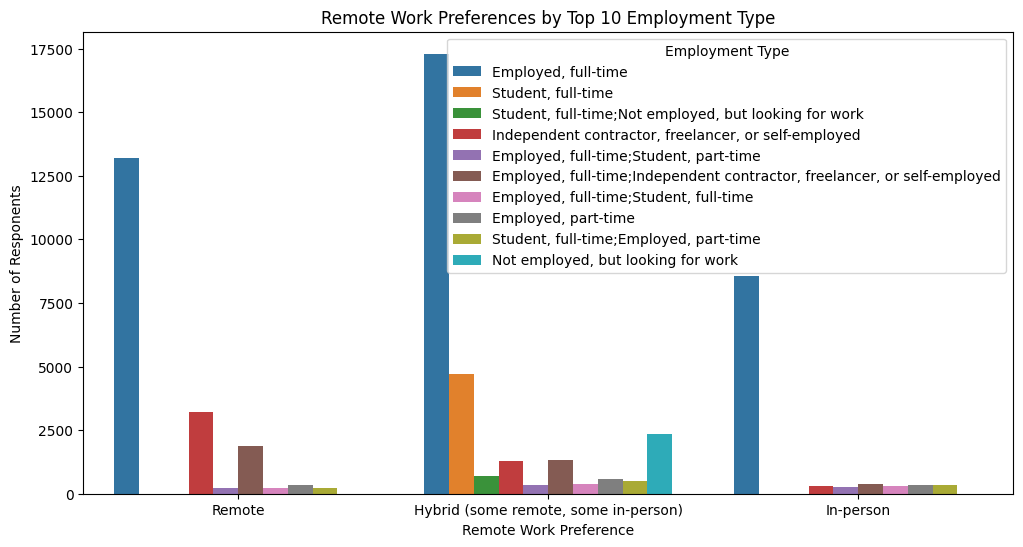

In [26]:
top_jobs = df['Employment'].value_counts().nlargest(10).index
df_top = df[df['Employment'].isin(top_jobs)]

plt.figure(figsize=(12,6))
sns.countplot(x='RemoteWork', hue='Employment', data=df_top)
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Responents')
plt.title('Remote Work Preferences by Top 10 Employment Type')
plt.legend(title='Employment Type')
plt.show()

#### Step 7: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Correlation between YearsCodePro and JobSatPoints: -0.03


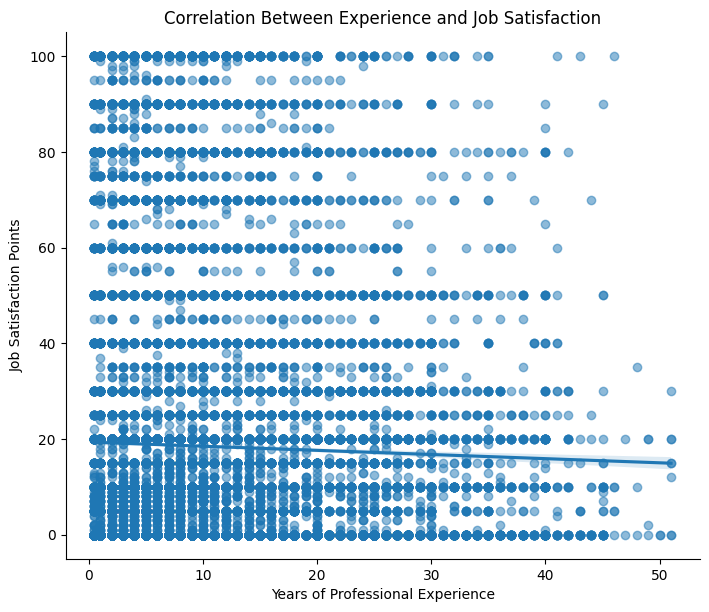

In [29]:

def years_to_float(x):
    if pd.isna(x):
        return None
    x = str(x).lower().strip()
    if "less than 1" in x:
        return 0.5
    elif "more than 50" in x:
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(years_to_float)

# تنظيف البيانات من القيم المفقودة
df_clean = df[['YearsCodePro_num', 'JobSatPoints_1']].dropna()

# حساب معامل الارتباط
correlation = df_clean['YearsCodePro_num'].corr(df_clean['JobSatPoints_1'])
print(f"Correlation between YearsCodePro and JobSatPoints: {correlation:.2f}")

# رسم scatter plot مع خط الاتجاه
sns.lmplot(x='YearsCodePro_num', y='JobSatPoints_1', data=df_clean, height=6, aspect=1.2, scatter_kws={'alpha':0.5})
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Job Satisfaction Points')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      100.0   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   100.0   
Primary/elementary school                                         100.0   
Secondary school (e.g. American high school, Ge...                  0.0   
Some college/university study without earning a...                  0.0   

Employment                                          Student, full-time  
EdLevel                                                                 
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                       0.0  
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    0.0  
Primary/elementary school                                          0.0  
Secondary school (e.g. American high school, Ge...               100.0  
Some college/university study withou

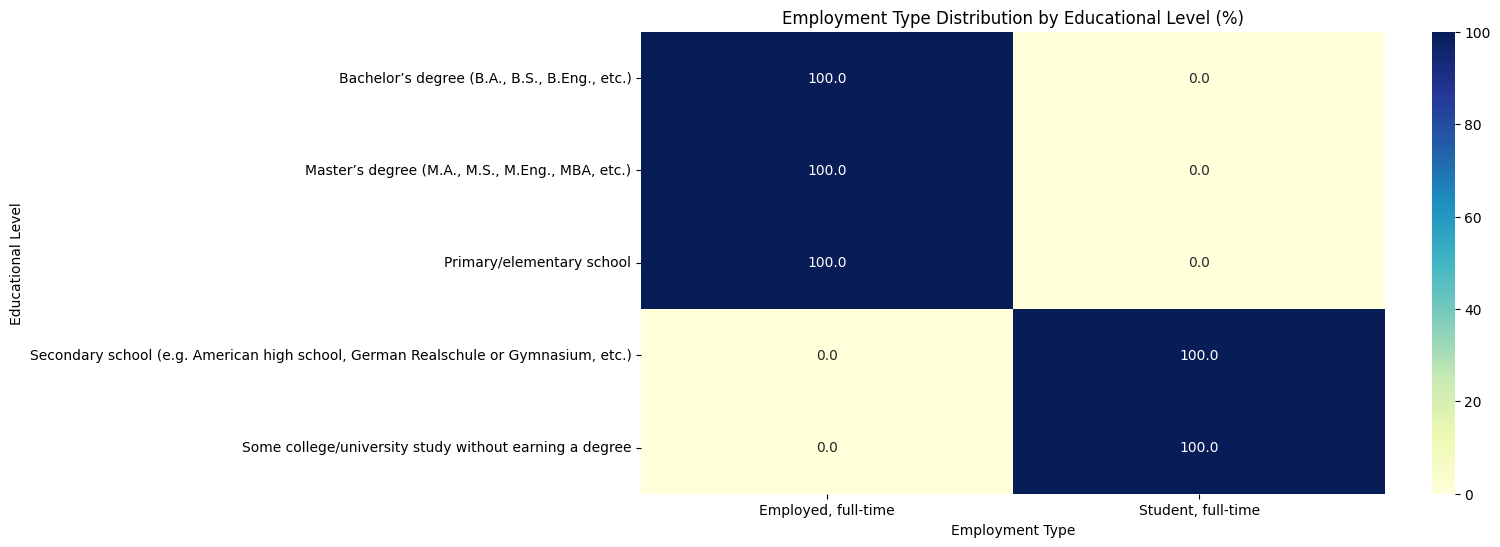

<Figure size 1200x600 with 0 Axes>

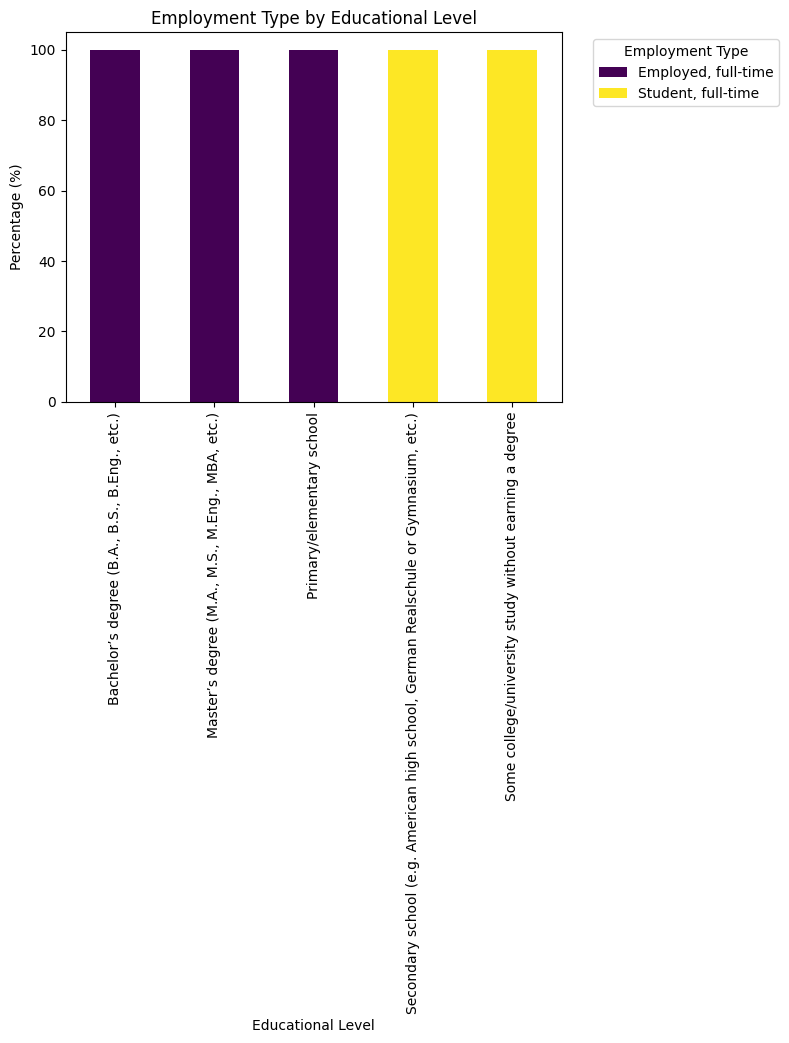

In [30]:
edu_emp_crosstab = pd.crosstab(df['EdLevel'], df['Employment'].head(), normalize='index') * 100
print(edu_emp_crosstab.round(2))  # عرض النسب المئوية لكل فئة


plt.figure(figsize=(12,6))
sns.heatmap(edu_emp_crosstab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Employment Type Distribution by Educational Level (%)')
plt.ylabel('Educational Level')
plt.xlabel('Employment Type')
plt.show()

plt.figure(figsize=(12,6))
edu_emp_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Employment Type by Educational Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Educational Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
df.to_csv('full_cleaned_dataset.csv', index=False)
print("Full dataset saved as 'full_cleaned_dataset.csv'")

Full dataset saved as 'full_cleaned_dataset.csv'


Copyright © IBM Corporation. All rights reserved.
